In [74]:
# https://github.com/jblumenstock/diid17/blob/master/DIID17-PS1.ipynb

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%run 'utils.ipynb'
import gdal
import utils 

In [108]:
hh_data=pd.read_csv("../Data/HH/WFP/Food Security May 2016.csv")

In [77]:
hh_data.head()

,Unnamed: 0,SubmissionDate,district,subcounty,parish,village,clusterID,hhID,A_hhage,A_education,...,Millet,Sorghum,Potato,Banana,Rice,OtherCrop,D_foodstocks,H_alcahol,MakesDecisionFood,DecisionCash
0,1,13683967434,abim,Abim T.C.,oyaro,oliabong,1,11,45,10,...,No,No,No,No,No,Yes,No,No,NaN,NaN
1,2,13683837453,abim,Abim S/C,Aninata,Aninata South,2,1,32,11,...,No,Yes,No,No,No,Yes,Yes,No,NaN,NaN
2,3,13683837458,abim,Abim S/C,Aninata,Aninata South,2,2,39,5,...,No,Yes,No,No,No,No,No,No,NaN,NaN
3,4,13683837465,abim,Abim S/C,Aninata,Aninata South,2,3,63,0,...,No,Yes,Yes,No,No,Yes,Yes,No,NaN,NaN
4,5,13683837471,abim,Abim S/C,Aninata,Aninata South,2,4,38,0,...,No,Yes,Yes,No,No,No,Yes,Yes,NaN,NaN


In [78]:
hh_data.columns.tolist()

['Unnamed: 0',
 'SubmissionDate',
 'district',
 'subcounty',
 'parish',
 'village',
 'clusterID',
 'hhID',
 'A_hhage',
 'A_education',
 'hhmaleA_male',
 'hhmaleA_male1',
 'hhmaleA_male2',
 'hhmaleA_male3',
 'hhmaleA_male4',
 'hhmaleA_male5',
 'hhmaleA_male6',
 'hhfemaleA_female',
 'hhfemaleA_female1',
 'hhfemaleA_female2',
 'hhfemaleA_female3',
 'hhfemaleA_female4',
 'hhfemaleA_female5',
 'hhfemaleA_female6',
 'primarychildrenA_primarymale',
 'primarychildrenA_primaryfemale',
 'primaryattend1A_attendmale',
 'primaryattend1A_attendfemale',
 'primaryattend2A_notattendmale',
 'primaryattend2A_notattendfemale',
 'primarynotattendA_reasonmale',
 'primarynotattendA_reasonfemale',
 'A_reasonothermale',
 'A_reasonotherfemale',
 'A_programme_1',
 'A_programme_2',
 'A_programme_3',
 'A_programme_4',
 'A_programme_5',
 'A_programmeother',
 'A_death',
 'A_deathb',
 'A_death_5',
 'A_death_5coz1',
 'A_death_5coz2',
 'A_death_Adultcoz',
 'A_death_5coz1other',
 'A_death_5coz2other',
 'A_death_Adultcoz

In [79]:
hh_data["OwnLivestock"].value_counts()

No     2237
Yes    2092
Name: OwnLivestock, dtype: int64

In [80]:
hh_data["OwnRadio"].value_counts()

No     3792
Yes     537
Name: OwnRadio, dtype: int64

In [81]:
hh_data["Assets_score"]=hh_data["OwnRadio"].map({'Yes': 1, 'No': 0})+hh_data["OwnBicycle"].map({'Yes': 1, 'No': 0})+ \
hh_data["OwnBed"].map({'Yes': 1, 'No': 0})+ hh_data["OwnTable"].map({'Yes': 1, 'No': 0})+hh_data["OwnLivestock"].map({'Yes': 1, 'No': 0})

In [82]:
hh_data["Assets_score"]

0       1
1       1
2       3
3       5
4       1
5       1
6       2
7       0
8       0
9       1
10      4
11      1
12      2
13      2
14      0
15      1
16      0
17      1
18      1
19      0
20      0
21      0
22      0
23      3
24      3
25      3
26      0
27      3
28      0
29      2
       ..
4299    0
4300    0
4301    0
4302    0
4303    1
4304    0
4305    1
4306    0
4307    1
4308    0
4309    2
4310    1
4311    0
4312    0
4313    0
4314    0
4315    0
4316    0
4317    0
4318    1
4319    1
4320    2
4321    1
4322    0
4323    1
4324    0
4325    0
4326    0
4327    1
4328    2
Name: Assets_score, Length: 4329, dtype: int64

In [83]:
hh_data["district"].value_counts()

abim             708
kaabong          677
kotido           627
amudat           613
napak            608
moroto           552
nakapiripirit    544
Name: district, dtype: int64

In [84]:
matching_table_dict={
"foodconsumptionG_cereals" : "FCSStapCere",
"foodconsumptionG_roots" : "FCSStapRoo",
"foodconsumptionG_pulses" : "FCSPulse",
"foodconsumptionG_veg" : "FCSVeg",
"foodconsumptionG_fruits" : "FCSFruit",
"foodconsumptionG_meat" : "FCSProtMeat",
"foodconsumptionG_fish" : "FCSProtFish",
"foodconsumptionG_eggs" : "FCSProtEgg",
"foodconsumptionG_milk" : "FCSDairy",
"foodconsumptionG_oil" : "FCSFat",
"foodconsumptionG_sugar" : "FSCSugar",
"foodconsumptionG_condiments" : "FCSCond"}

In [85]:
hh_data.rename(columns=matching_table_dict,inplace=True)

In [86]:
hh_data["FCSStap"]=hh_data["FCSStapCere"]+hh_data["FCSStapRoo"]
hh_data.loc[hh_data["FCSStap"]>7,"FCSStap"] =7

In [87]:
hh_data["FCSProt"]=hh_data["FCSProtMeat"]+hh_data["FCSProtFish"]+hh_data["FCSProtEgg"]
#hh_data.loc[data["FCSProt"]>7,"FCSProt"] =7

In [88]:
hh_data["FCS"]=2*hh_data["FCSStap"]+3*hh_data["FCSPulse"]+1*hh_data["FCSVeg"]+1*hh_data["FCSFruit"]+4*hh_data["FCSProt"]+4*hh_data["FCSDairy"]+0.5*hh_data["FSCSugar"]+0.5*hh_data["FCSFat"]

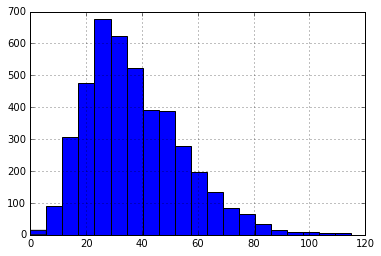

In [89]:
hh_data["FCS"].hist(bins=20)

In [90]:
hh_cluster_coord_fcs=hh_data.groupby("clusterID")["gpsLatitude","gpsLongitude","FCS"].mean()

In [107]:
hh_village_coord_fcs=hh_data.groupby("village")["gpsLatitude","gpsLongitude","FCS","Assets_score"].mean()
hh_village_coord_fcs=hh_village_coord_fcs.dropna(axis=0, how='any')
hh_village_coord_fcs.head()

,gpsLatitude,gpsLongitude,FCS,Assets_score
village,,,,
Abim East,2.708589,33.665483,44.050000,3.100000
Acan Penino,2.848594,33.694574,35.750000,2.111111
Acek Abuk,2.746334,33.673905,41.111111,2.000000
Adipala,2.450002,34.322738,26.525000,0.300000
Agule,2.493331,33.897964,22.842105,1.947368


In [106]:
hh_village_coord_fcs.shape

(251, 6)

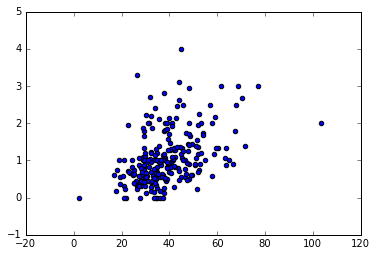

In [104]:
 plt.scatter(hh_village_coord_fcs["FCS"], hh_village_coord_fcs["Assets_score"])

### Assign the coordinates to a grid system

In [97]:
# this illustrates how you can read the nightlight image
raster_file = '../Data/Satellite/NightLight/F182013.v4c_web.stable_lights.avg_vis.tif'
x_size, top_left_x_coords, top_left_y_coords, centroid_x_coords, centroid_y_coords, bands_data = read_raster(raster_file)

In [98]:
def get_lon_idx(lon):
    lon_idx = np.where(top_left_x_coords < lon)[0][-1]
    return lon_idx
def get_lat_idx(lat):
    lat_idx = np.where(top_left_y_coords > lat)[0][-1]
    return lat_idx

In [99]:
hh_village_coord_fcs["i"]=hh_village_coord_fcs["gpsLongitude"].apply(get_lon_idx)
hh_village_coord_fcs["j"]=hh_village_coord_fcs["gpsLatitude"].apply(get_lat_idx)

In [100]:
hh_village_coord_fcs.to_csv("../Data/Intermediate_files/hh_village_coord_fcs.csv")